<a href="https://colab.research.google.com/github/rickytirta17/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

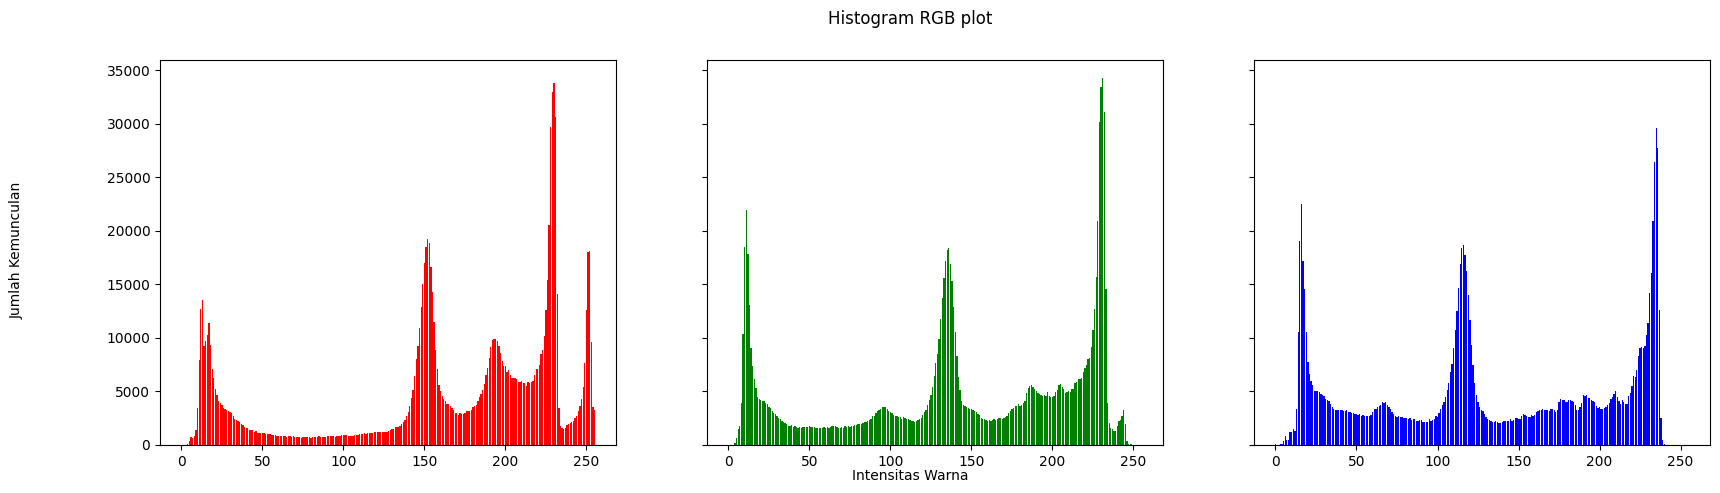

In [4]:
# No 3
img = cv.imread('/content/drive/MyDrive/PCVK/sooyaaa.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

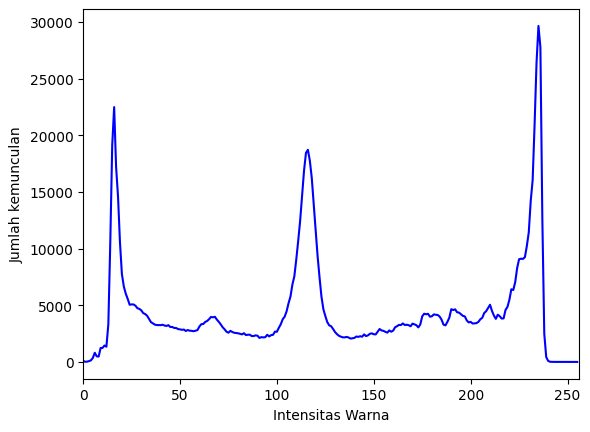

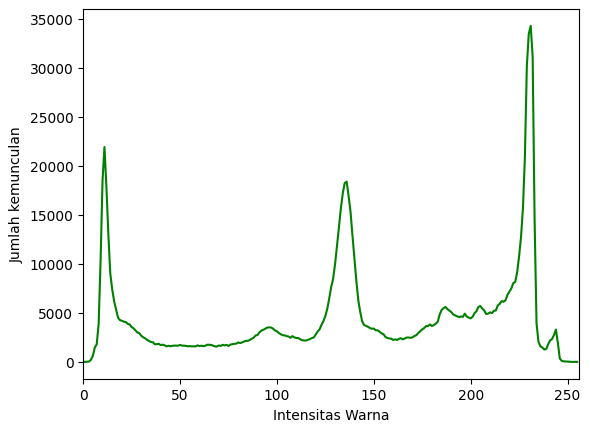

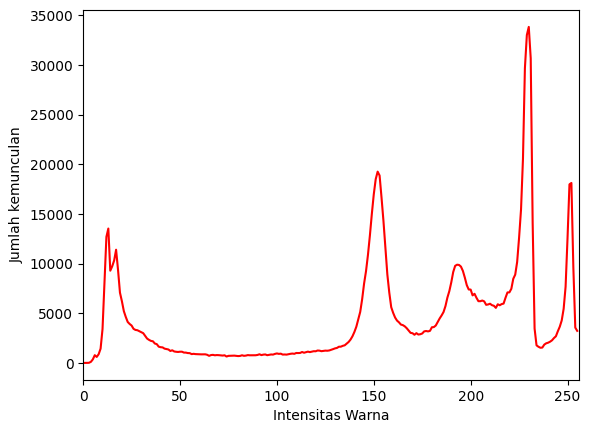

In [5]:

#No 4
img = cv.imread('/content/drive/MyDrive/PCVK/sooyaaa.jpg')

colors = ('b','g','r')
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.xlim([0,256])
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")
  
  plt.show()

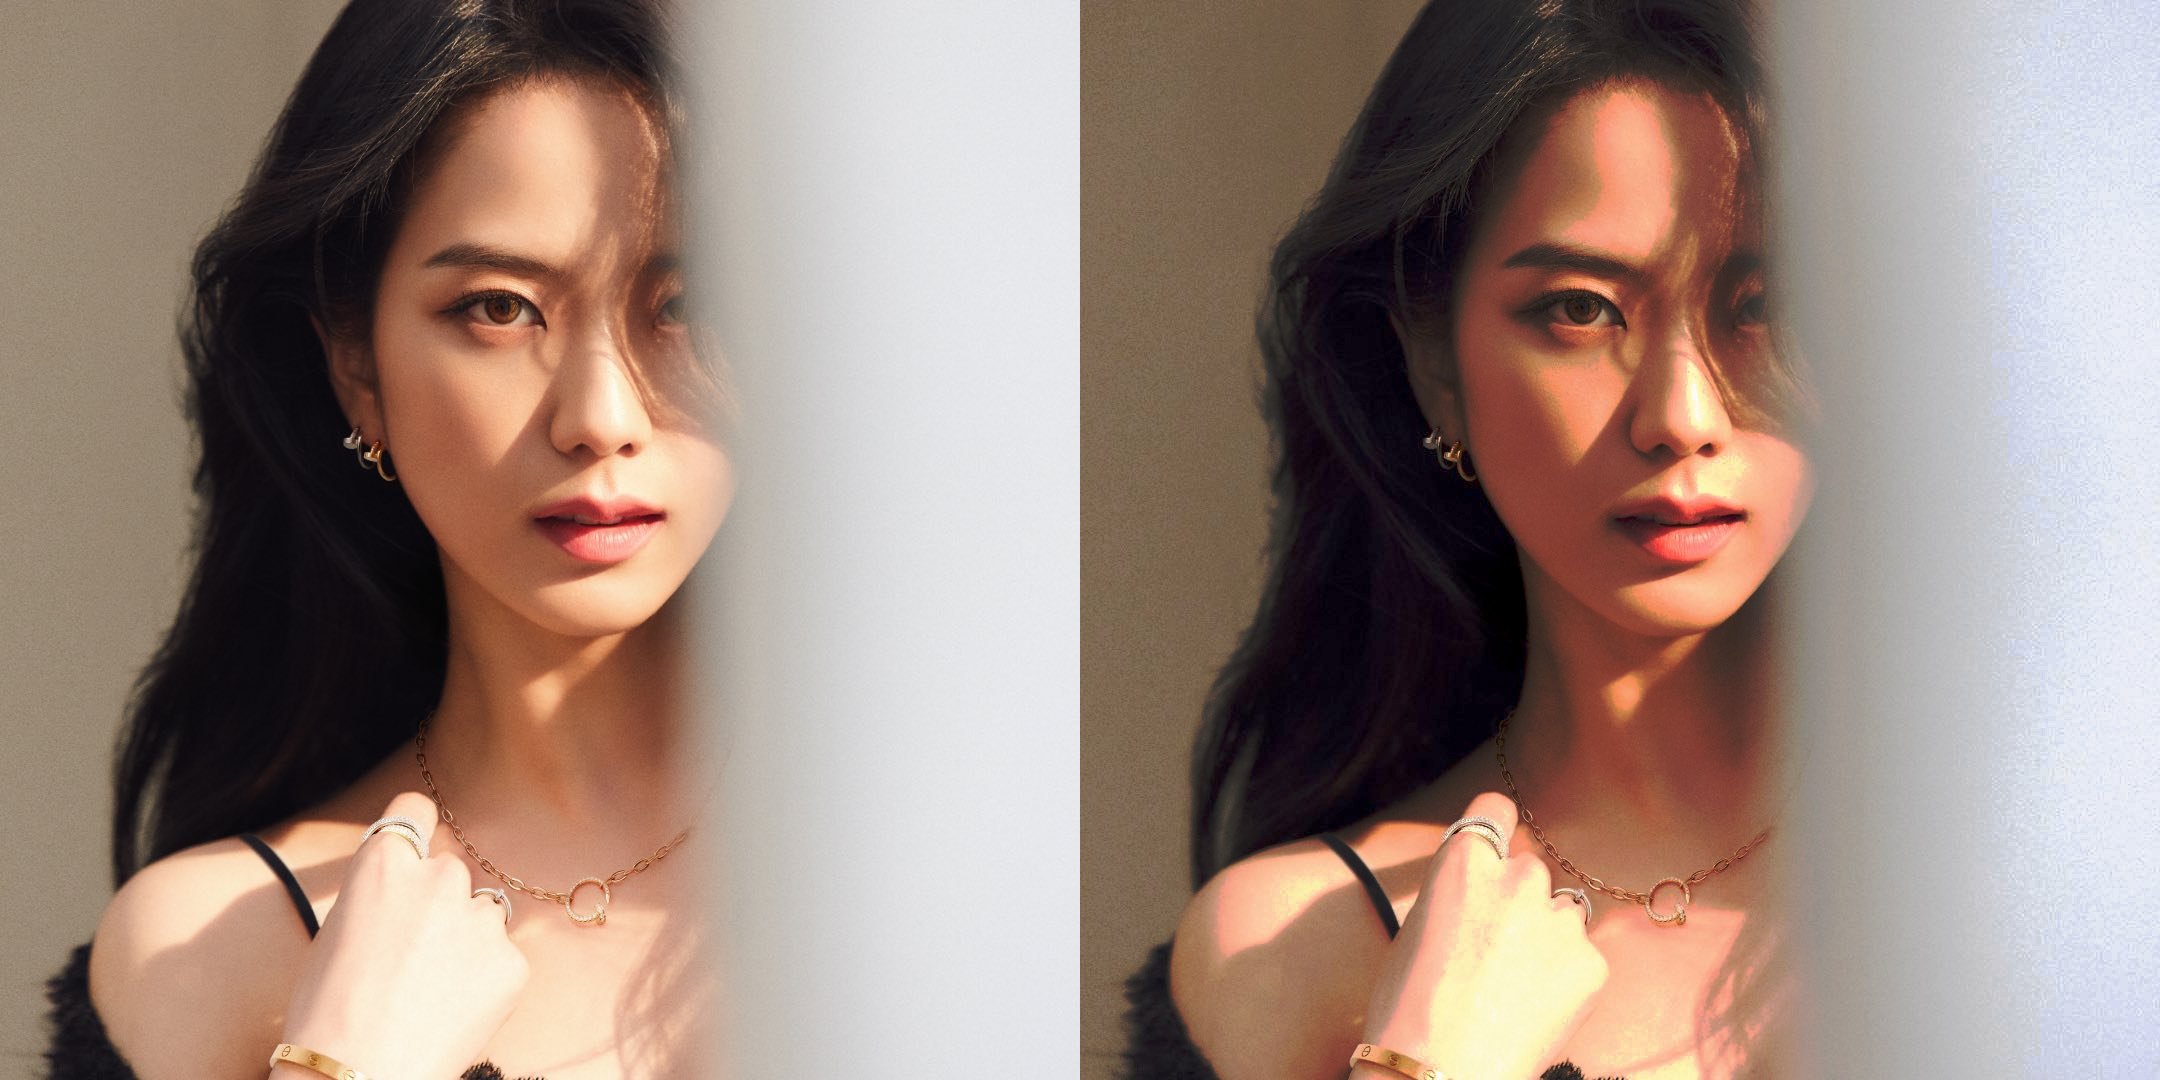

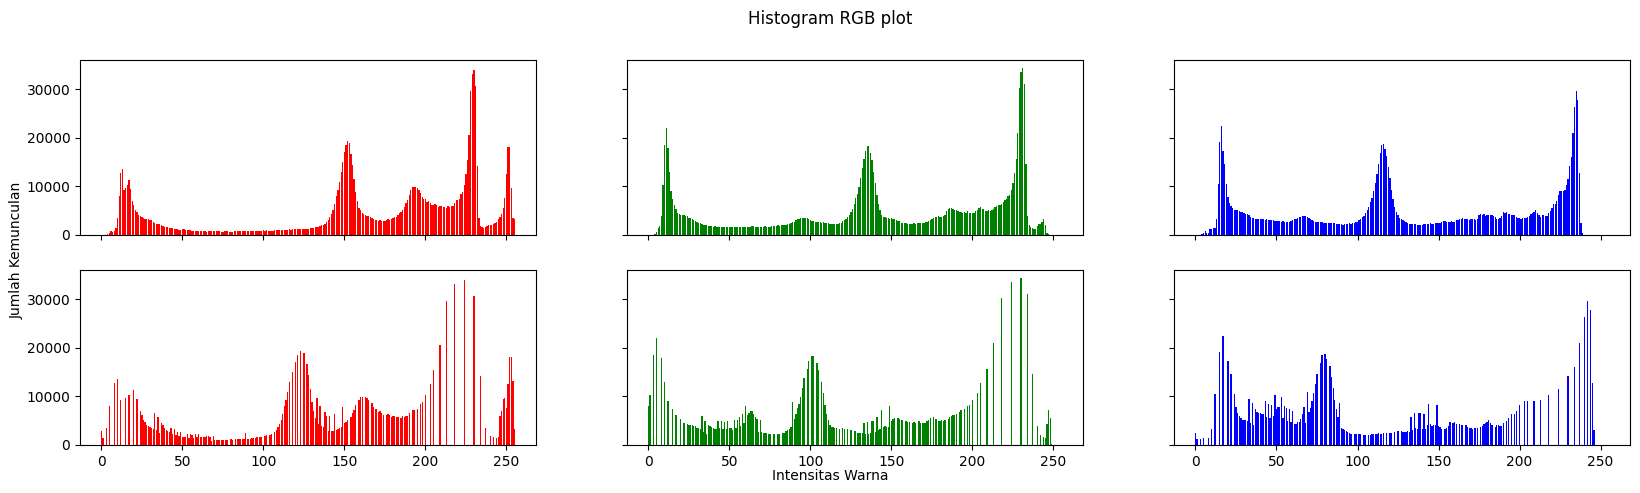

In [6]:
#No 5
img = cv.imread('/content/drive/MyDrive/PCVK/sooyaaa.jpg')
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histo_asli = histog(img)

#convert to Numpy array 
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#STEP 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

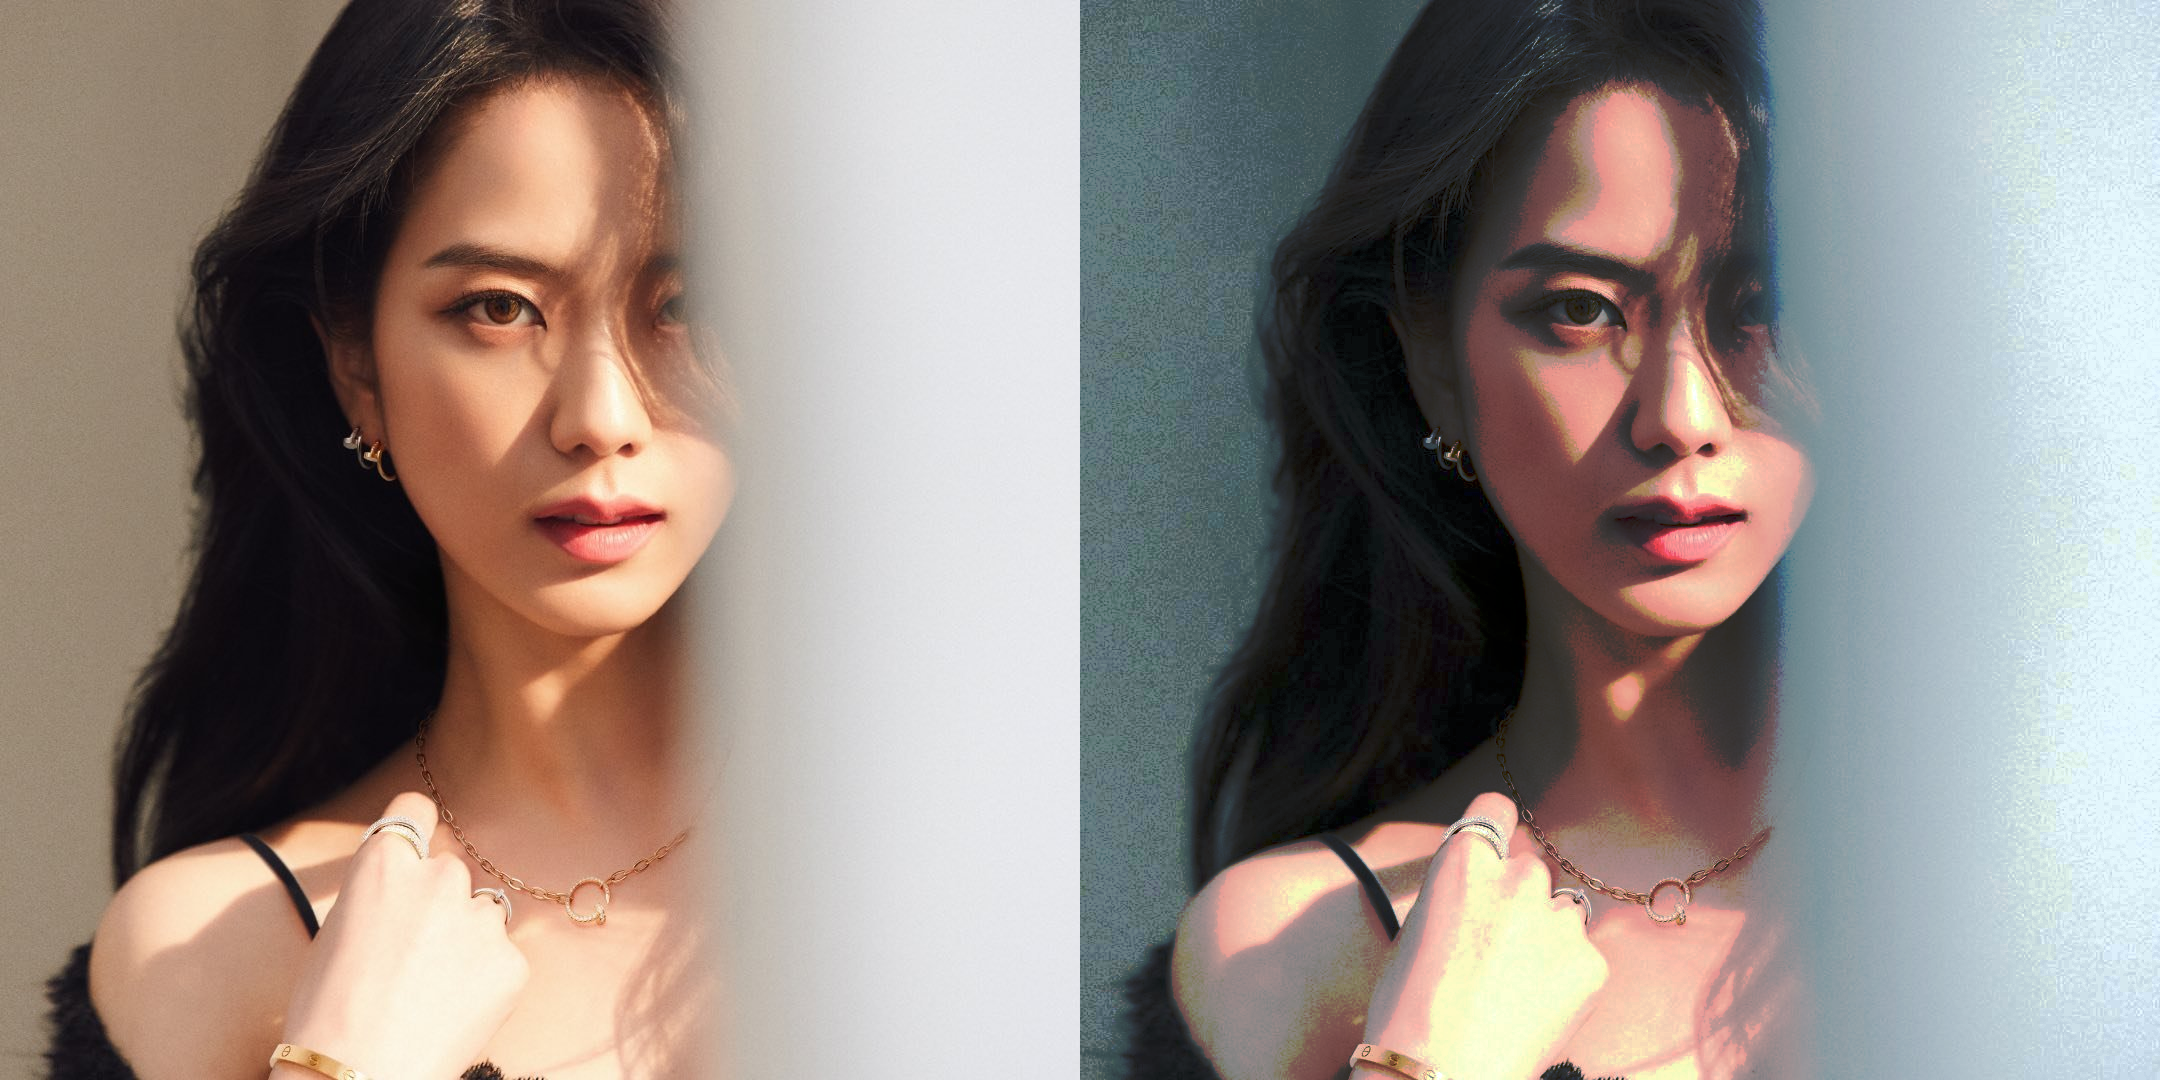

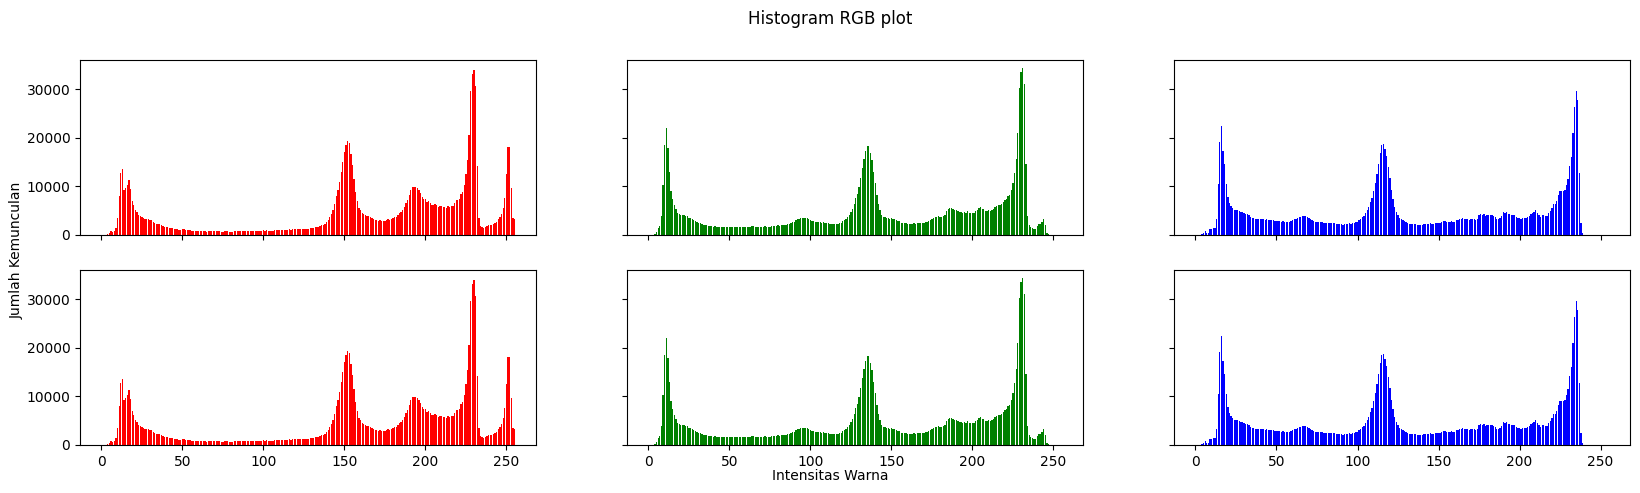

In [7]:
#No 6
img = cv.imread('/content/drive/MyDrive/PCVK/sooyaaa.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


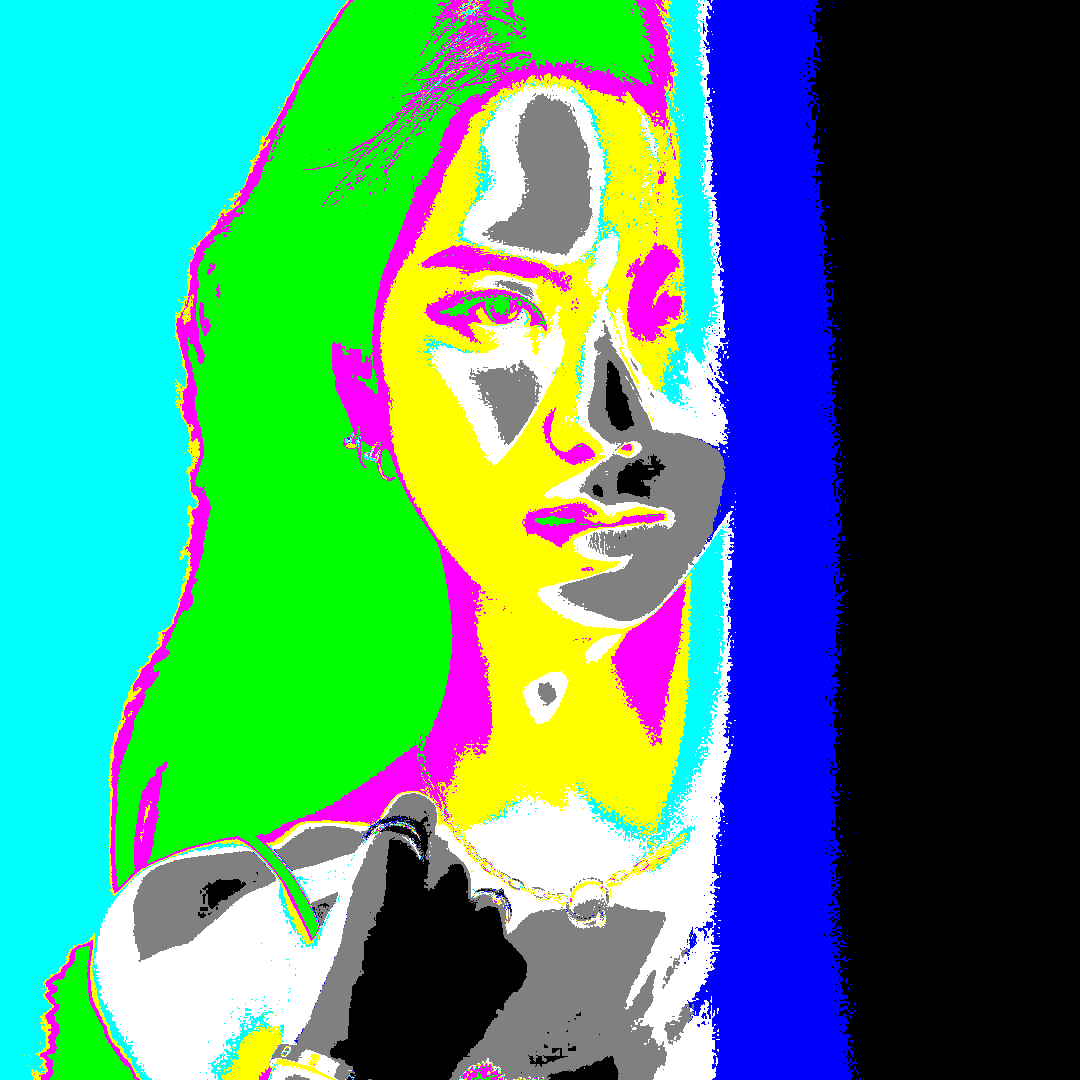

In [10]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from PIL import Image

# Load image
img = cv.imread('/content/drive/MyDrive/PCVK/sooyaaa.jpg')

# Convert image to numpy array
img_arr = np.array(img)

# Reshape array to 2D array (pixel rows x pixel columns, RGB values)
img_arr_reshaped = img_arr.reshape(-1, 3)

# Define number of clusters
n_clusters = 8

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters)

# Fit the KMeans model on the reshaped image array
kmeans.fit(img_arr_reshaped)

# Get the labels of each pixel in the image
labels = kmeans.labels_

# Create color map
color_map = {
    0: (0, 0, 0),       # Hitam
    1: (0, 255, 0),     # Hijau
    2: (255, 255, 0),   # Kuning
    3: (0, 0, 255),     # Biru
    4: (0, 255, 255),   # Cyan
    5: (255, 0, 255),   # Magenta
    6: (255, 255, 255), # Putih
    7: (128, 128, 128)  # Abu-abu
}

# Map each label to its corresponding color
colors = [color_map[label] for label in labels]

# Reshape the colors array to the original image shape
colors_reshaped = np.reshape(colors, img_arr.shape)

# Create image from the colors array
new_img = Image.fromarray(np.uint8(colors_reshaped))

new_img.show()


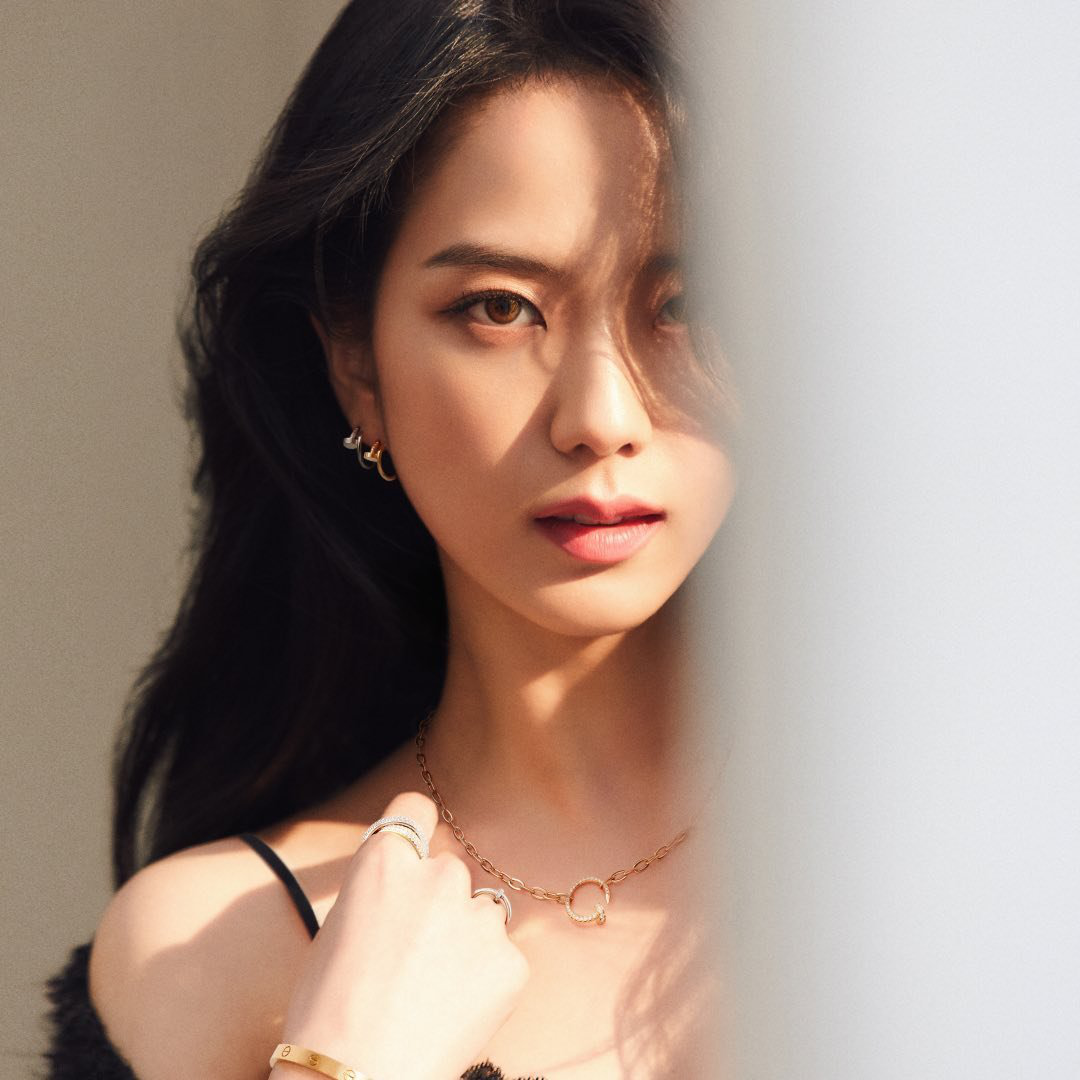

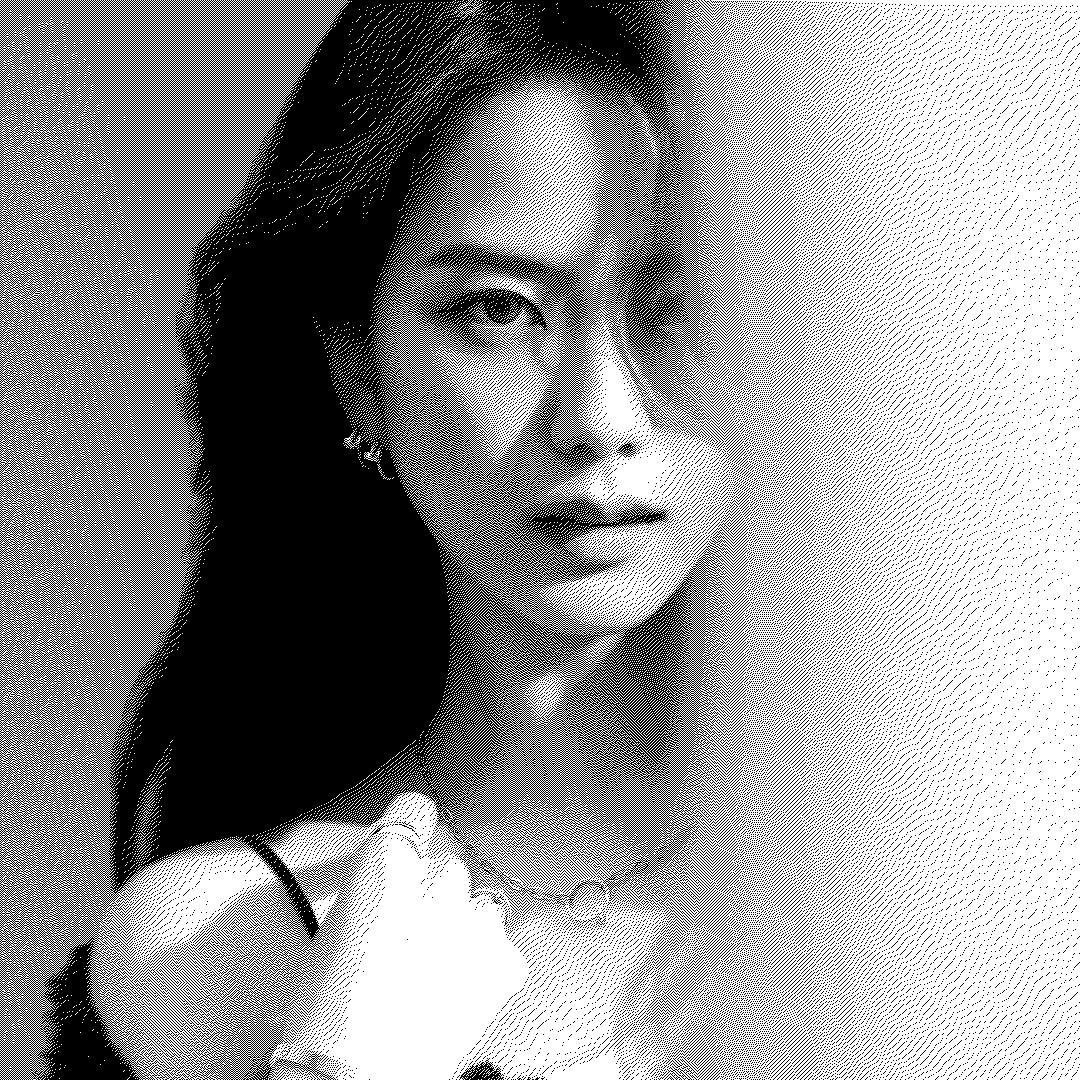

In [18]:
from PIL import Image

# Load image
img = Image.open("sooyaaa.jpg")

# Convert image to grayscale
gray_img = img.convert('L')

# Get image dimensions
width, height = gray_img.size

# Create empty image to store dithered image
dithered_img = Image.new('L', (width, height), color=0)

# Define the Floyd and Steinberg dithering matrix
dither_matrix = [
    [0, 0, 0],
    [0, 0, 7],
    [3, 5, 1]
]

# Iterate through each pixel in the image
for y in range(height):
    for x in range(width):
        old_pixel = gray_img.getpixel((x, y))
        new_pixel = 255 if old_pixel > 127 else 0  # thresholding
        dithered_img.putpixel((x, y), new_pixel)  # set the pixel in the dithered image
        quant_error = old_pixel - new_pixel
        
        # Distribute the quantization error to neighboring pixels using the dithering matrix
        for i in range(3):
            for j in range(3):
                if 0 <= x+i-1 < width and 0 <= y+j-1 < height:
                    neighbor_pixel = gray_img.getpixel((x+i-1, y+j-1))
                    neighbor_pixel += quant_error * dither_matrix[i][j] // 16
                    gray_img.putpixel((x+i-1, y+j-1), neighbor_pixel)

# Show the original image and the dithered image side by side
img.show()
dithered_img.show()

# Save the dithered image
dithered_img.save("nama_gambar_dithered.jpg")
